<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (4).zip to archive (4) (1).zip
CSV files found: ['heart.csv']
✅ Dataset loaded successfully!


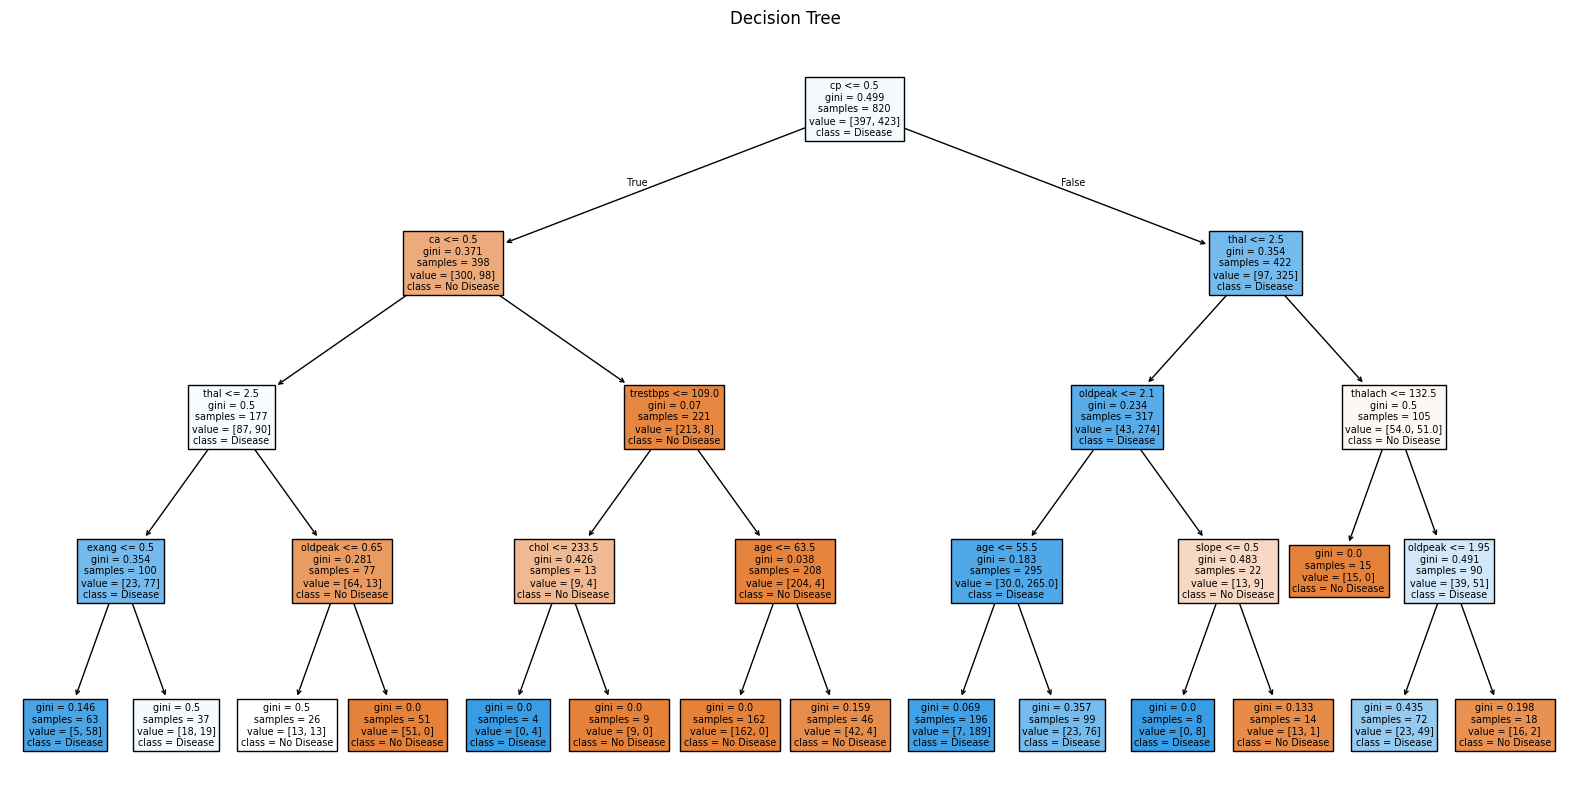

🔹 Decision Tree Accuracy: 0.8
[[71 31]
 [10 93]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

🔹 Random Forest Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



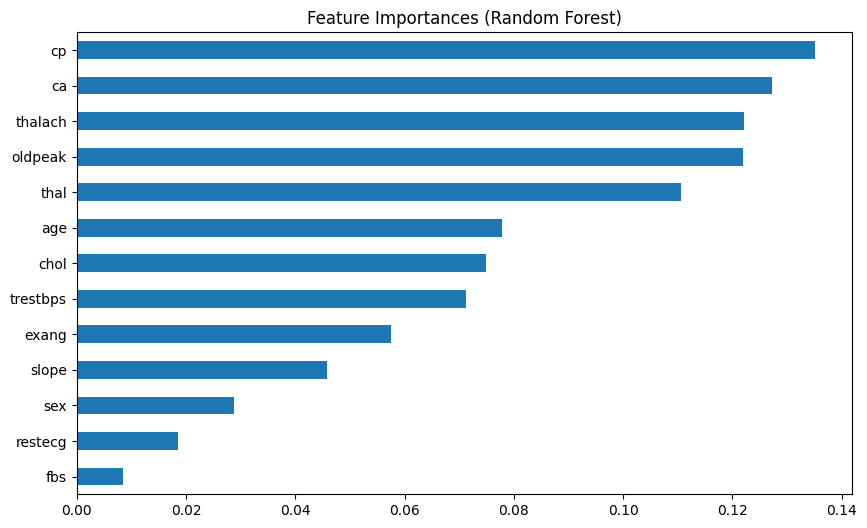

🔸 Decision Tree CV Accuracy: 83.41%
🔸 Random Forest CV Accuracy: 99.71%


In [4]:
!pip install graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile
import os
from google.colab import files

uploaded = files.upload()
zip_file_name = next(iter(uploaded))
extract_to = '/content/dataset'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

csv_files = [f for f in os.listdir(extract_to) if f.endswith('.csv')]
print("CSV files found:", csv_files)

df = pd.read_csv(os.path.join(extract_to, csv_files[0]))
print("✅ Dataset loaded successfully!")
df.head()

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

y_pred_dt = dt.predict(X_test)
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances (Random Forest)")
plt.show()

cv_dt = cross_val_score(dt, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)
print("🔸 Decision Tree CV Accuracy: {:.2f}%".format(cv_dt.mean() * 100))
print("🔸 Random Forest CV Accuracy: {:.2f}%".format(cv_rf.mean() * 100))
